Mielage Prediction - Regression Analysis

Objective: To predict efficient mileage using the LinearRegression algorithm.

Data Source : The dataset was taken from the statLib library which is maintained at camegie Mellon university.The dataset was used in the 1983 American Statistical Association Exposition

IMPORT LIBRARIES

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

IMPORT DATA

In [7]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


DATA PREPROCESSING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

REMOVE MISSING VALUES

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


DATA VISUALIZATION

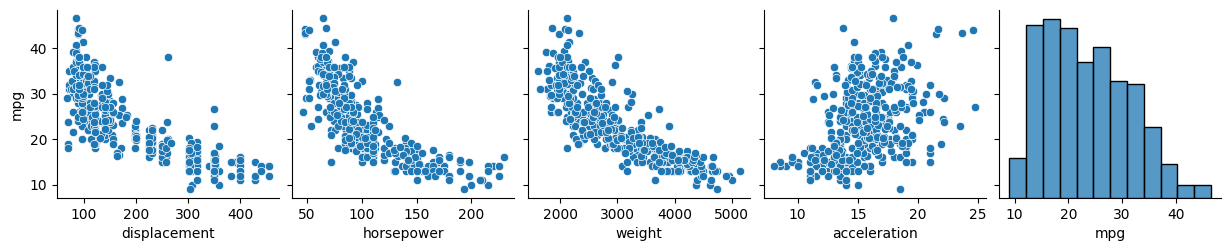

In [16]:
sns.pairplot(df,x_vars = ['displacement','horsepower','weight','acceleration','mpg'],y_vars = ['mpg']);

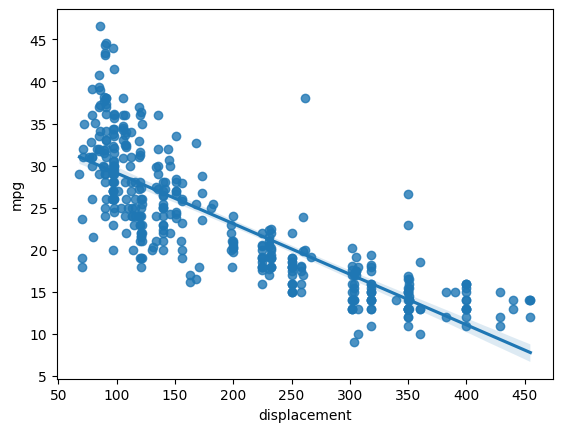

In [17]:
sns.regplot(x='displacement',y='mpg',data = df);

DEFINE TARGET VARIABLE y AND FEATURE x

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [19]:
y=df['mpg']

In [20]:
y.shape

(392,)

In [21]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [22]:
X.shape

(392, 4)

In [23]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


SCALING DATA

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
X = ss.fit_transform(X)

In [27]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [28]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


TRAIN TEST SPLIT DATA

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=2529)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((117, 4), (275, 4), (117,), (275,))

LINEAR REGRESSION MODEL

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.intercept_

23.601118059983822

In [36]:
lr.coef_

array([-1.07085922, -0.64133484, -5.18021642,  0.26756035])

PREDICT TEST DATA

In [37]:
y_pred = lr.predict(X_test)

In [38]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

MODEL ACCURACY

In [39]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [40]:
mean_absolute_error(y_test,y_pred)

3.3564087099398776

In [41]:
mean_absolute_percentage_error(y_test,y_pred)

0.14970671967399587

In [42]:
r2_score(y_test,y_pred)

0.6923289624942408

POLYNOMIAL REGRESSION

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [45]:
X_train2 = poly.fit_transform(X_train)

In [46]:
X_test2 = poly.fit_transform(X_test)

In [47]:
lr.fit(X_train2,y_train)

LinearRegression()

In [48]:
lr.intercept_

21.55533901604716

In [49]:
lr.coef_

array([-2.2748814 , -3.73899676, -2.6609481 ,  0.24305983,  2.0800206 ,
       -0.80160787, -3.04666232,  2.11059861,  1.49729576,  2.93749665])

In [50]:
y_pred_poly = lr.predict(X_test2)

MODEL ACCURACY

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [52]:
mean_absolute_error(y_test,y_pred_poly)

3.205494068743995

In [53]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.14706619052559178

In [54]:
r2_score(y_test,y_pred_poly)

0.6842004879324937

Explaination :
Mileage prediction using a regression model involves using historical data to create a mathematical relationship between various features or variables and the mileage of a vehicle. Regression analysis is a statistical technique that helps us understand and predict the relationship between a dependent variable and one or more independent variables (such as engine size, weight, horsepower, etc.).

Data collection: Gather a dataset that includes information about different vehicles, including their mileage and relevant features. The dataset should ideally cover a wide range of vehicles to capture variations in mileage based on different factors.

Data preprocessing: Clean and preprocess the dataset to handle missing values, outliers, and inconsistencies. This step ensures that the dataset is suitable for regression analysis.

Feature selection: Identify the independent variables (features) that are likely to have an impact on mileage. This can include variables such as engine size, weight, horsepower, number of cylinders, transmission type, etc. The selection of features is based on domain knowledge and statistical analysis.

Splitting the dataset: Divide the dataset into two parts: a training set and a test set. The training set is used to build the regression model, while the test set is used to evaluate its performance.

Model training: Select an appropriate regression model, such as linear regression, polynomial regression, or decision tree regression. Fit the model to the training data, which involves estimating the coefficients or weights associated with each feature.

Model evaluation: Once the model is trained, evaluate its performance using the test dataset. Common evaluation metrics for regression models include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and coefficient of determination (R-squared).

Mileage prediction: Once the model is deemed satisfactory, it can be used to predict the mileage of new, unseen vehicles based on their features. Simply input the relevant feature values into the trained model, and it will generate a predicted mileage value.